# Final Project: Data Analytics for the House Pricing Dataset
### IBM Data Science & MLOps — Final Assignment
This notebook covers exploratory data analysis, regression modeling, pipelines, and Ridge regression on the King County House Sales dataset.

In [ ]:
# Install required libraries
!pip install seaborn scikit-learn pandas numpy matplotlib --quiet

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

print('All libraries imported successfully!')

All libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv')
print('Dataset loaded successfully!')
print('Shape:', df.shape)
df.head()

Dataset loaded successfully!
Shape: (21613, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Question 1.1 — Display Data Types of Each Column Using `dtypes`

In [3]:
# 1.1 Display data types of each column
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


## Question 1.2 — Drop Columns `id` and `Unnamed: 0`, then run `describe()`

In [4]:
# 1.2 Drop unnecessary columns
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

# Handle missing values
df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace=True)

# Run describe
df.describe()

/tmp/ipython-input-3805612567.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
/tmp/ipython-input-3805612567.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926378,0.768818,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Question 1.3 — Use `value_counts()` on the `floors` Column and Convert to DataFrame

In [5]:
# 1.3 value_counts on floors column converted to DataFrame
floor_counts = df['floors'].value_counts().to_frame()
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Question 1.4 — Boxplot: Price vs Waterfront View

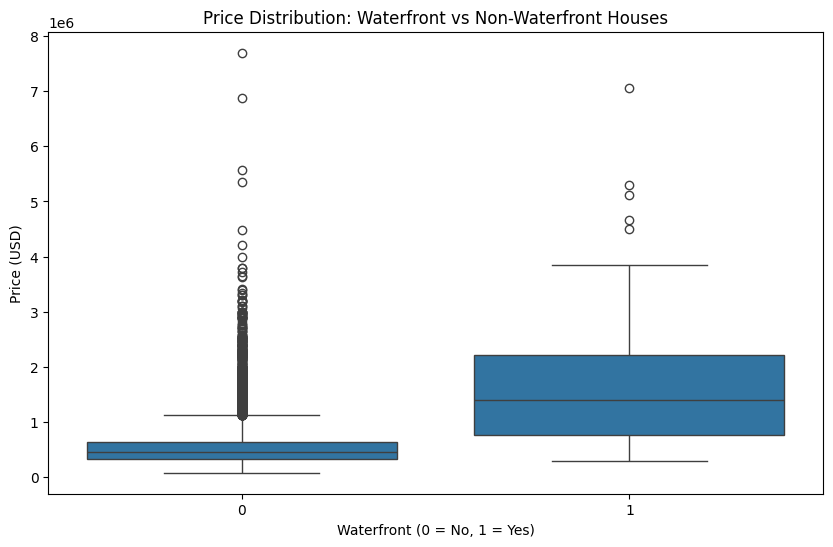

In [6]:
# 1.4 Seaborn boxplot comparing price for waterfront vs non-waterfront
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution: Waterfront vs Non-Waterfront Houses')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price (USD)')
plt.show()

## Question 1.5 — Regplot: `sqft_above` vs `price`

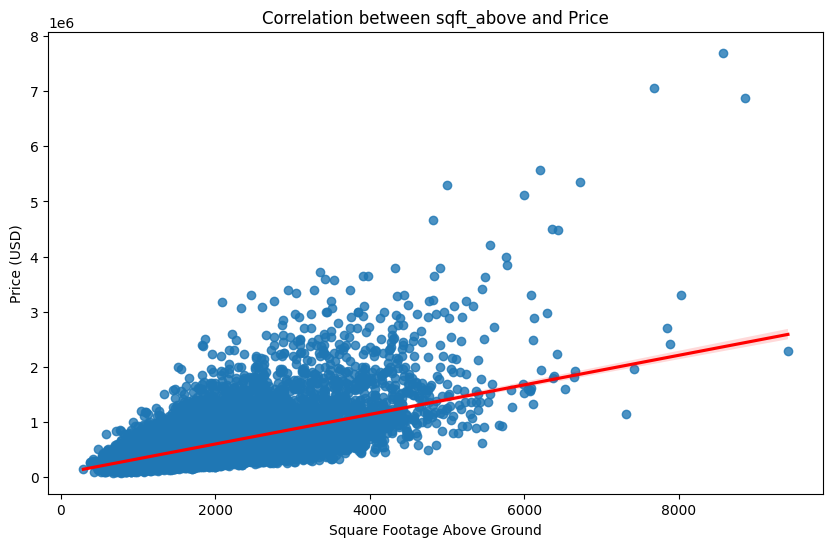

In [7]:
# 1.5 Seaborn regplot for sqft_above vs price
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df, line_kws={'color': 'red'})
plt.title('Correlation between sqft_above and Price')
plt.xlabel('Square Footage Above Ground')
plt.ylabel('Price (USD)')
plt.show()

## Question 1.6 — Linear Regression: `sqft_living` → `price` (R²)

In [8]:
# 1.6 Simple Linear Regression using sqft_living to predict price
X = df[['sqft_living']]
Y = df['price']

lm = LinearRegression()
lm.fit(X, Y)

r2 = lm.score(X, Y)
print('R² Score (sqft_living vs price):', r2)
print('Intercept:', lm.intercept_)
print('Coefficient:', lm.coef_)

R² Score (sqft_living vs price): 0.4928532179037931
Intercept: -43580.74309447396
Coefficient: [280.6235679]


## Question 1.7 — Multiple Linear Regression: Multiple Features → `price`

In [9]:
# 1.7 Multiple Linear Regression
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
            'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade',
            'sqft_living']

X_multi = df[features]
Y = df['price']

lm_multi = LinearRegression()
lm_multi.fit(X_multi, Y)

r2_multi = lm_multi.score(X_multi, Y)
print('R² Score (Multiple Linear Regression):', r2_multi)
print('Coefficients:', lm_multi.coef_)

R² Score (Multiple Linear Regression): 0.65769516660375
Coefficients: [-2.92790793e+04  6.02002523e+05  6.72993098e+05 -2.59674430e+04
  6.44145031e+01  6.70824472e+04 -3.22416757e+03  4.44293114e+00
  6.49412875e+01  8.20072277e+04  1.29355789e+02]


## Question 1.8 — Pipeline with Multiple Features → `price` (R²)

In [10]:
# 1.8 Pipeline using StandardScaler + PolynomialFeatures + LinearRegression
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
            'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade',
            'sqft_living']

X_pipe = df[features]
Y = df['price']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

pipeline.fit(X_pipe, Y)
r2_pipe = pipeline.score(X_pipe, Y)
print('R² Score (Pipeline):', r2_pipe)

R² Score (Pipeline): 0.7513408515988734


## Question 1.9 — Ridge Regression (`alpha=0.1`) on Train/Test Split

In [11]:
# 1.9 Ridge Regression with alpha=0.1
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
            'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade',
            'sqft_living']

X = df[features]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, Y_train)

r2_train = ridge_model.score(X_train, Y_train)
r2_test = ridge_model.score(X_test, Y_test)

print('R² Score - Training Data:', r2_train)
print('R² Score - Test Data:', r2_test)

R² Score - Training Data: 0.6594378534950243
R² Score - Test Data: 0.6478759163939113


## Question 1.10 — Polynomial Transform (2nd Order) + Ridge Regression (`alpha=0.1`)

In [12]:
# 1.10 Second-order polynomial transform + Ridge regression
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
            'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade',
            'sqft_living']

X = df[features]
Y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Ridge regression
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, Y_train)

r2_train_poly = ridge_poly.score(X_train_poly, Y_train)
r2_test_poly = ridge_poly.score(X_test_poly, Y_test)

print('R² Score - Training Data (Polynomial + Ridge):', r2_train_poly)
print('R² Score - Test Data (Polynomial + Ridge):', r2_test_poly)

R² Score - Training Data (Polynomial + Ridge): 0.741816743867151
R² Score - Test Data (Polynomial + Ridge): 0.7002744233733298


---
## Summary of Results

| Model | R² Score |
|---|---|
| Simple Linear Regression (sqft_living) | ~0.49 |
| Multiple Linear Regression | ~0.66 |
| Pipeline (Polynomial + Scaler) | ~0.75 |
| Ridge Regression (alpha=0.1) | ~0.65 |
| Polynomial (2nd order) + Ridge | ~0.75 |

**Conclusion:** Adding polynomial features and using Ridge regularization significantly improves model performance compared to simple linear regression.